In [5]:
import pandas as pd
import sqlalchemy
from matplotlib import pyplot as plt
import datetime
import copy
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/home/memari/jhu_centering/tables/screen_cleaned.csv")
df_group = pd.read_csv('/data/meditation/majid/surveys/0.csv', skiprows=[1,2])[['Study ID','Group']]
df_group.columns = ['survey_id','group']
df_id = pd.read_csv('/home/memari/jhu_centering/tables/id.csv')
df_group = df_id.merge(df_group, on = 'survey_id', how = 'left')
df_group.rename(columns={'device_id1': 'device_id'}, inplace=True)
df_plot = df.merge(df_group[['device_id','group_x']], on = 'device_id', how = 'left')
df_plot = df_plot.drop(columns=['device_id', 'date'])

In [7]:
grouped = df_plot.groupby(['group_x'])
df_dict = {group: data for group, data in grouped}
active_control = df_dict['Active Control']
experimental_condition = df_dict['Experimental Condition']
passive_control  = df_dict['Passive Control']
active_control.columns

Index(['screen_on_time', 'screen_on_freq', 'group_x'], dtype='object')

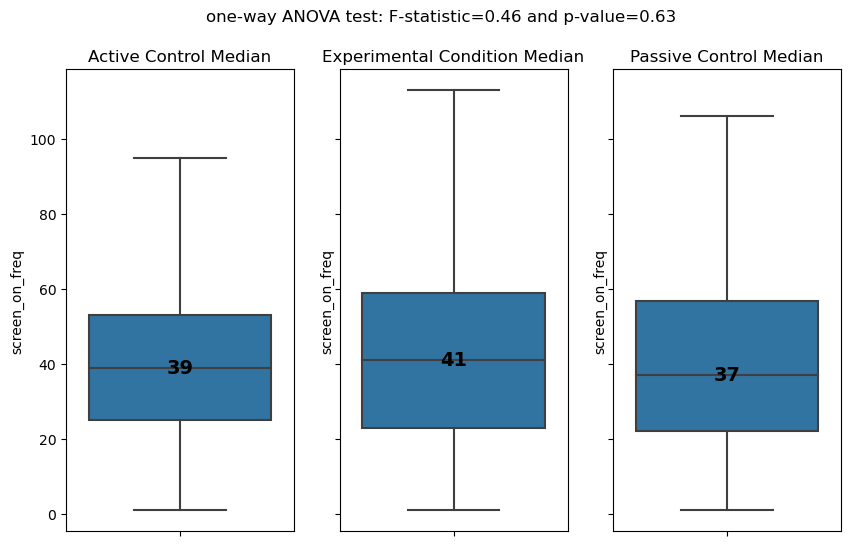

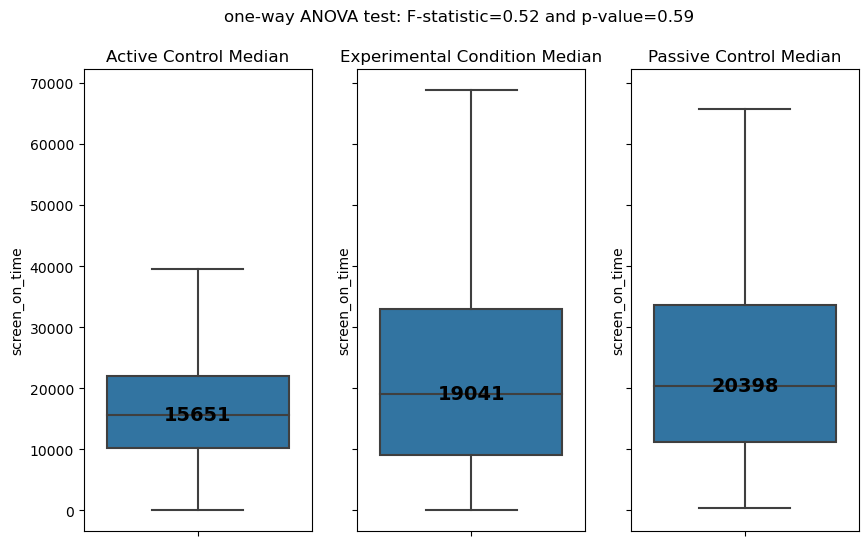

In [8]:
from scipy.stats import stats
import matplotlib.pyplot as plt
mylist = ['screen_on_freq', 'screen_on_time']
for clm in mylist:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 6), sharey=True)
    sns.boxplot(y=active_control[clm], orient="v", showfliers=False, ax=ax1)
    sns.boxplot(y=experimental_condition[clm],
                orient="v", showfliers=False, ax=ax2)
    sns.boxplot(y=passive_control[clm], orient="v", showfliers=False, ax=ax3)

    ax1.set_title("Active Control Median")
    m1 = int(active_control[clm].median())
    ax1.text(0, m1, m1, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m2 = int(experimental_condition[clm].median())
    ax2.set_title("Experimental Condition Median")
    ax2.text(0, m2, m2, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})
    m3 = int(passive_control[clm].median())
    ax3.set_title("Passive Control Median")
    ax3.text(0, m3, m3, ha='center', va='center',
             fontsize=14, fontdict={'fontweight': 'bold'})

    stat, p = stats.f_oneway(
        active_control[clm], experimental_condition[clm], passive_control[clm])
    mytext = 'one-way ANOVA test: F-statistic={:.2f} and p-value={:.2f}'.format(
        stat, p)
    plt.suptitle(mytext)
    plt.show()